In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pwd()

'/content'

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = df[['Age','EstimatedSalary','Purchased']]

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(400, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

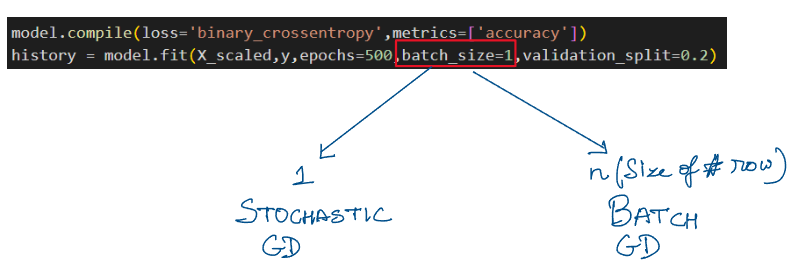

# Stochastic GD

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7383 - loss: 0.6083 - val_accuracy: 0.5750 - val_loss: 0.7392
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8088 - loss: 0.4467 - val_accuracy: 0.6375 - val_loss: 0.6515
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8039 - loss: 0.3719 - val_accuracy: 0.6625 - val_loss: 0.5646
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7972 - loss: 0.3527 - val_accuracy: 0.7125 - val_loss: 0.4985
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.3338 - val_accuracy: 0.7500 - val_loss: 0.4312
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.2681 - val_accuracy: 0.8125 - val_loss: 0.3867
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8284 - loss: 0.3284 - val_accuracy: 0.8625 - val_loss: 0.3493
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8979 - loss: 0.2251 - val_accu

# Batch GD

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=500,batch_size=320,validation_split=0.2)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9187 - loss: 0.2643 - val_accuracy: 0.8875 - val_loss: 0.2656
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9187 - loss: 0.2517 - val_accuracy: 0.8875 - val_loss: 0.2708
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9187 - loss: 0.2445 - val_accuracy: 0.8750 - val_loss: 0.2812
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9156 - loss: 0.2399 - val_accuracy: 0.8750 - val_loss: 0.2829
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9156 - loss: 0.2357 - val_accuracy: 0.8750 - val_loss: 0.2885
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9125 - loss: 0.2324 - val_accuracy: 0.8750 - val_loss: 0.2923
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9156 - loss: 0.2295 - val_accuracy: 0.8750 - val_loss: 0.2943
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9156 - loss: 0.2269 - val_accuracy: 0.8750 - val_loss: 

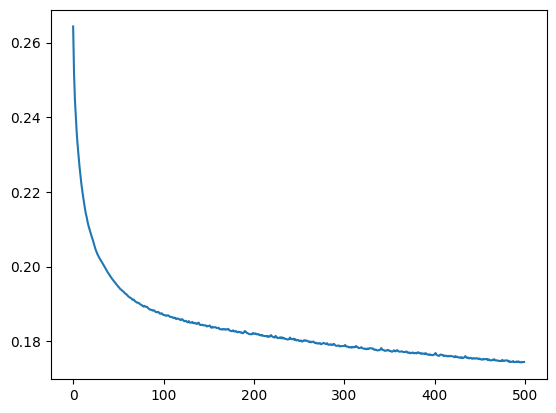

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])